# Multiple Linear Regression

problem statement:

Build a predictive linear regression model for given dataset, given temperature, humidity, wind speed , wind bearing, visibility, pressure  predict apparent temperature
https://drive.google.com/open?id=1WsJxbsh51SL1UhT0xEvNynZTKy4nOwLM

In [1]:
#importing necessary library
#importing matplotlib 
import matplotlib.pyplot as plt
#importing pandas 
import pandas as pd
import seaborn as sea
#importing numpy
import numpy as np
#importing math module
import math
# loading csv data from the file given in the url
weather_data = pd.read_csv("weatherHistory.csv")
#printing top 5 values of data
weather_data.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [2]:
#printing info about data
weather_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
Formatted Date              96453 non-null object
Summary                     96453 non-null object
Precip Type                 95936 non-null object
Temperature (C)             96453 non-null float64
Apparent Temperature (C)    96453 non-null float64
Humidity                    96453 non-null float64
Wind Speed (km/h)           96453 non-null float64
Wind Bearing (degrees)      96453 non-null float64
Visibility (km)             96453 non-null float64
Loud Cover                  96453 non-null float64
Pressure (millibars)        96453 non-null float64
Daily Summary               96453 non-null object
dtypes: float64(8), object(4)
memory usage: 8.8+ MB


In [3]:
#checking for null values
weather_data.isnull().sum()

Formatted Date                0
Summary                       0
Precip Type                 517
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Loud Cover                    0
Pressure (millibars)          0
Daily Summary                 0
dtype: int64

In [4]:
#filling null values in data set with mode
weather_data['Precip Type'] = weather_data.fillna(weather_data['Precip Type'].mode())
#checking for null values again after filling
weather_data.isnull().sum()

Formatted Date              0
Summary                     0
Precip Type                 0
Temperature (C)             0
Apparent Temperature (C)    0
Humidity                    0
Wind Speed (km/h)           0
Wind Bearing (degrees)      0
Visibility (km)             0
Loud Cover                  0
Pressure (millibars)        0
Daily Summary               0
dtype: int64

In [5]:
#checking for columns present in data set
weather_data.columns

Index(['Formatted Date', 'Summary', 'Precip Type', 'Temperature (C)',
       'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)',
       'Wind Bearing (degrees)', 'Visibility (km)', 'Loud Cover',
       'Pressure (millibars)', 'Daily Summary'],
      dtype='object')

In [6]:
#dropping unnecessary columns
weather_data.drop(['Summary','Precip Type','Daily Summary','Loud Cover','Formatted Date','Wind Speed (km/h)','Pressure (millibars)','Wind Bearing (degrees)'], axis = 1, inplace = True)

In [7]:
#checking after dropping columns
weather_data.head()

,Temperature (C),Apparent Temperature (C),Humidity,Visibility (km)
0,9.472222,7.388889,0.89,15.8263
1,9.355556,7.227778,0.86,15.8263
2,9.377778,9.377778,0.89,14.9569
3,8.288889,5.944444,0.83,15.8263
4,8.755556,6.977778,0.83,15.8263


In [8]:
#seperating all clumns
temp_hum = np.array(weather_data['Humidity'])
temp_vis = np.array(weather_data['Visibility (km)'])
temp_t   = np.array(weather_data['Temperature (C)'])
temp_a_t = np.array(weather_data['Apparent Temperature (C)'])

plotting different graphs

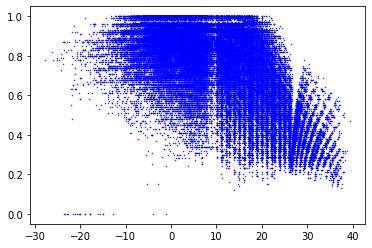

In [10]:
#plotting graph of humidity v/s temperature
plt.scatter(temp_a_t,temp_hum,color='b',s=0.2)

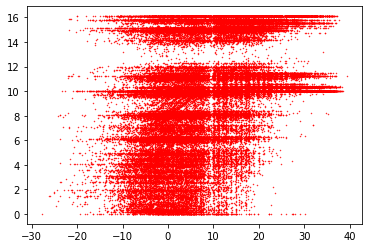

In [11]:
#plotting graph of visiblity v/s temperature
plt.scatter(temp_a_t,temp_vis,color='r',s=0.2)

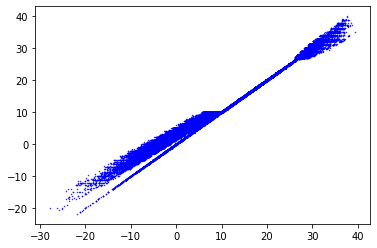

In [12]:
#plotting graph of apparent temperature v/s temperature
plt.scatter(temp_a_t,temp_t,color='b',s=0.2)

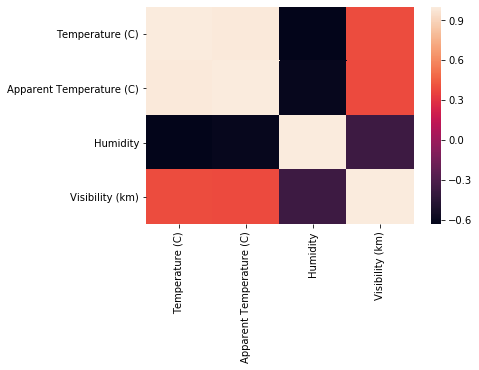

In [13]:
#plotting heatmap
sea.heatmap(weather_data.corr())

### seperating dataset into train and test data

In [14]:
#looking at top five values of data set
weather_data.head()

,Temperature (C),Apparent Temperature (C),Humidity,Visibility (km)
0,9.472222,7.388889,0.89,15.8263
1,9.355556,7.227778,0.86,15.8263
2,9.377778,9.377778,0.89,14.9569
3,8.288889,5.944444,0.83,15.8263
4,8.755556,6.977778,0.83,15.8263


In [16]:
# seeing all the necessary features of data set
weather_data.describe()

,Temperature (C),Apparent Temperature (C),Humidity,Visibility (km)
count,96453.000000,96453.000000,96453.000000,96453.000000
mean,11.932678,10.855029,0.734899,10.347325
std,9.551546,10.696847,0.195473,4.192123
min,-21.822222,-27.716667,0.000000,0.000000
25%,4.688889,2.311111,0.600000,8.339800
50%,12.000000,12.000000,0.780000,10.046400
75%,18.838889,18.838889,0.890000,14.812000
max,39.905556,39.344444,1.000000,16.100000


## checking for outliers

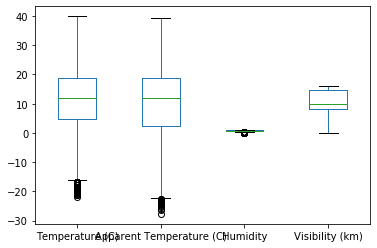

In [30]:
weather_data.plot(kind='box')              # observing outliers of each column
plt.show()                      # we can see that ouliers are at lower end

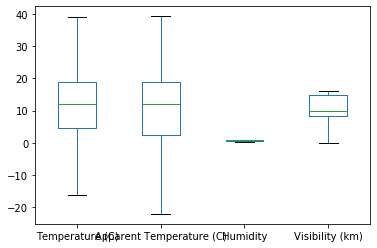

In [33]:
# removing outliers from columns
for col in weather_data.columns:
    quartile1 = weather_data[col].quantile(0.25)
    quartile3 = weather_data[col].quantile(0.75)
    IQR = quartile3 - quartile1        # Inter-quartile range
    # getting indices of outliers as we can see ouliers are at lower end only getting those only
    outliers = weather_data.loc[weather_data[col] < (quartile1 - 1.5*IQR)].index
    weather_data = weather_data.drop(outliers)
#plotting box plot to see the outliers in the data
weather_data.plot(kind='box')
plt.show()

In [34]:
# changing the degree celcius temperature to kelvin scale
#just to avoid arithmatic operation errors
weather_data['Apparent Temperature (C)'] = weather_data['Apparent Temperature (C)'] + 273.15
weather_data['Temperature (C)'] = weather_data['Temperature (C)'] + 273.15

In [36]:
# rescaling both temperatures to kelvin and renaming also
weather_data.rename(columns={'Temperature (C)':'Temperature (K)', 'Apparent Temperature (C)':'Apparent Temperature (K)'},inplace=True)

### performing feature scaling

In [37]:
# performing scaling to data to get more correct theta values
for col in ['Temperature (K)','Humidity', 'Visibility (km)']:
    minimum = weather_data[col].min()
    maximum = weather_data[col].max()
    weather_data[col]= (weather_data[col] - minimum)*100/(maximum - minimum)
# checking top five values after feature scaling    
weather_data.head()

,Temperature (K),Apparent Temperature (K),Humidity,Visibility (km)
0,46.435414,280.538889,86.746988,98.3
1,46.223656,280.377778,83.132530,98.3
2,46.263991,282.527778,86.746988,92.9
3,44.287587,279.094444,79.518072,98.3
4,45.134617,280.127778,79.518072,98.3


In [38]:
# Splitting 70 % dataset into train set & 30 % dataset into dataset into test set
train = weather_data.sample(frac=0.7, random_state=3)   # selecting random 0.7 fraction of dataset as train set   
# chossing different random state will give different random rows
test = weather_data.drop(train.index)            # selecting remaining i.e. 30% as test set
#printing shape of train set
print('Train set')
print(train.shape)
#seeing top 5 values of train set
train.head()

Train set
(67454, 4)


,Temperature (K),Apparent Temperature (K),Humidity,Visibility (km)
75510,38.267621,276.411111,83.132530,54.9
79242,52.314208,285.861111,38.554217,100.0
81295,38.257538,278.116667,62.650602,42.5
60218,46.848845,282.250000,87.951807,95.6
21152,26.701623,271.750000,100.000000,1.0


In [39]:
#printing shape and top 5 values of test data set
print('Test set')
print(test.shape)
test.head()

Test set
(28909, 4)


,Temperature (K),Apparent Temperature (K),Humidity,Visibility (km)
1,46.223656,280.377778,83.132530,98.3
2,46.263991,282.527778,86.746988,92.9
6,43.279218,278.672222,93.975904,62.0
7,45.164868,279.677778,86.746988,62.0
8,48.885752,283.972222,78.313253,62.0


In [42]:
total= len(train)                # total records in train set
# creating matrix of independent variables
#creating numpy array to make calculations faster
x_values = np.ones(total)
x_values = np.append(x_values, train['Temperature (K)'])
x_values = np.append(x_values, train['Humidity'])
x_values = np.append(x_values, train['Visibility (km)'])
x_values = x_values.reshape(4, total)
#train y value
y_values = np.array(train['Apparent Temperature (K)'])

# making accurate model

In [47]:
# initialising parameters
theta_zero, theta_one, theta_two, theta_three = 0,0,0,0 

# creating row matrix of parameters
theta = np.array([theta_zero, theta_one, theta_two, theta_three])
# prediction function
predict_y_values = lambda x_values: theta.dot(x_values)

# derivative of cost functions
def cost_func(row):
    return (predict_y_values(x_values) - y_values).dot(x_values[row])/total

alpha = 0.0001
iterations = 120000

# applying gradient descent alogorithm
for _ in range(iterations):
    theta0 = theta0 - alpha * cost_func(0)
    theta1 = theta1 - alpha * cost_func(1)
    theta2 = theta2 - alpha * cost_func(2)
    theta3 = theta3 - alpha * cost_func(3)
    theta = np.array([theta0, theta1, theta2, theta3])

In [48]:
# printing theta and its shape
print("theta  :  \n",theta)
print("shape of theta : ",theta.shape)

theta  :  
 [89.27551014  1.88866195  1.10201862  0.3190604 ]
shape of theta :  (4,)


# checking accuracy of model

In [49]:
# making predictor variable matrix & target varible array for test set
test_x_values =  np.ones(len(test))
test_x_values = np.append(test_x_values, test['Temperature (K)'])
test_x_values = np.append(test_x_values, test['Humidity'])
test_x_values = np.append(test_x_values, test['Visibility (km)'])
test_x_values = test_x_values.reshape(4, len(test))
#y test values
test_y_values = np.array(test['Apparent Temperature (K)'])

In [54]:
# calcualting accuracy using absolute error method
total_error = abs(predict(test_x_values) - test_y_values)/test_y_values
#checking accuracy using accuracy formula
accuracy = (1- total_error.sum()/len(test))

In [55]:
#printing accuracy percentage
accuracy *100

93.78322382891086